In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import lmfit

In [266]:
bez_prop=pd.read_csv("C:/Projects/VKT/olej_rot/bez_prop.csv", header=0)
bez_prop['p1[Pa]']=bez_prop['p1[Pa]'].str.replace(',','.').astype(float)
s_prop=pd.read_csv('C:/Projects/VKT/olej_rot/1_s_prop - List 1.csv', header=0)


In [267]:
s_prop['t[s]']

0       0
1      30
2      60
3      90
4     120
5     150
6     180
7     210
8     240
9     270
10    300
11    330
12    360
13    390
14    420
15    450
16    480
17    510
18    540
19    570
20    600
21    630
22    660
23    690
24    720
25    750
26    780
27    810
28    840
29    870
30    900
Name: t[s], dtype: int64

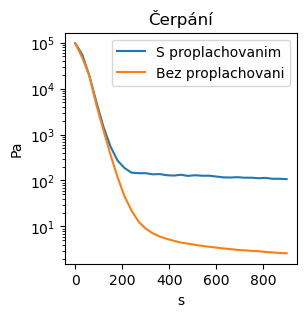

In [268]:
fig1, axs1 = plt.subplots(1, 1, figsize=(3, 3))
axs1.plot(s_prop['t[s]'], s_prop['p2[Pa]'], label="S proplachovanim")
axs1.plot(bez_prop['t[s]'], bez_prop['p1[Pa]'], label="Bez proplachovani")
axs1.set_xlabel('s')
axs1.set_ylabel('Pa')
axs1.set_title('Čerpání')
#axs1.autoscale(enable=True, axis='x', tight=True)
axs1.legend()
plt.yscale("log")

Fitovaci funkce $\ln(p) = \ln(p0) −\frac{S}{V}(t-t0)$

Fit with curve_fit
------------------

In [269]:
def fitfunc(x, SV):
    p=np.exp(np.log(96e3)-SV*(x))
    return p
par, cov = curve_fit(fitfunc, bez_prop['t[s]'], bez_prop['p1[Pa]'],  maxfev = 100000)
standev=np.sqrt(np.diag(cov))
print(par,'  -', standev)

[1.]   - [inf]


C:\Users\aleks\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fit with lmfit
--------------

In [ ]:
model = lmfit.Model(fitfunc)
#model.set_param_hint('p0', value=1e5, min=96e3, max=1e6)
model.set_param_hint('SV',value=2.2e-2, min=1e-2, max=1)
pars = model.make_params()
fit = model.fit(np.log(bez_prop['p1[Pa]']), pars, x=bez_prop['t[s]'])

In [271]:
fit.params

name,value,standard error,relative error,initial value,min,max,vary
SV,0.29703223,27.8411543,(9373.11%),0.022,0.01000000,1.00000000,True


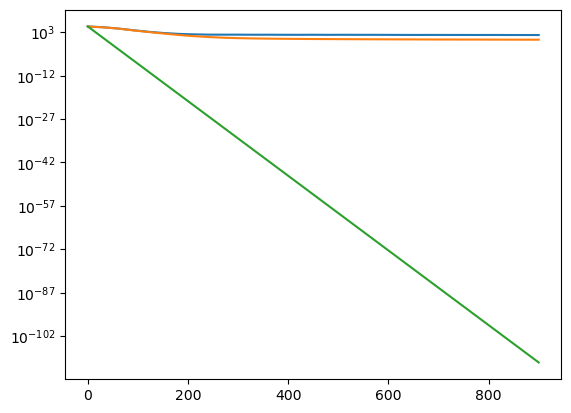

In [264]:
x=np.linspace(0,900,1000)
y=fitfunc(x,fit.params['SV'].value)
plt.plot(s_prop['t[s]'], s_prop['p2[Pa]'], label="S proplachovanim")
plt.plot(bez_prop['t[s]'], bez_prop['p1[Pa]'], label="Bez proplachovanim")
plt.yscale('log')
plt.plot(x,y)

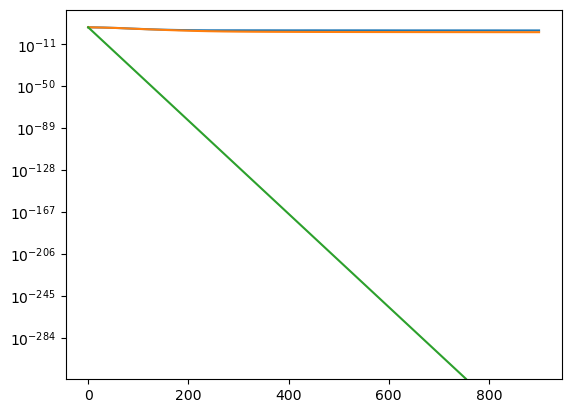

In [241]:
x=np.linspace(0,900,1000)
y=fitfunc(x, par[0],par[1])
plt.plot(s_prop['t[s]'], s_prop['p2[Pa]'], label="S proplachovanim")
plt.plot(bez_prop['t[s]'], bez_prop['p1[Pa]'], label="Bez proplachovanim")
plt.yscale("log")
plt.plot(x,y)